# 4 Degree of Freedom Robot Arm

In [1]:
import sys
import numpy as np
from sympy import *
import time
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import display, Math

from tools import *

# Variables and settings

In [2]:
# Constants
l0 = symbols('l_0')
l2 = symbols('l_2')
l3 = symbols('l_3')
l4 = symbols('l_4')
le = symbols('l_e')
l0_val = 5
l2_val = 20
l3_val = 15
l4_val = 5
le_val = 3


# Variables
t = symbols('t')
theta2 = Function(r"\theta_2")(t)
theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2, t, t)

theta3 = Function(r"\theta_3")(t)
theta3_dot = diff(theta3, t)
theta3_ddot = diff(theta3, t, t)

theta4 = Function(r"\theta_4")(t)
theta4_dot = diff(theta4, t)
theta4_ddot = diff(theta4, t, t)

d1 = Function('d_1')(t)
d1_dot = diff(d1, t)
d1_ddot = diff(d1, t, t)


alias = {}
# display as x dot instead of dx/dt, and ignore dependency (t)
alias.update({theta2: symbols(r"\theta_2"),
              theta2_dot: symbols(r"\dot{\theta_2}"),
              theta2_ddot: symbols(r"\ddot{\theta_2}"),
              theta3: symbols(r"\theta_3"),
              theta3_dot: symbols(r"\dot{\theta_3}"),
              theta3_ddot: symbols(r"\ddot{\theta_3}"),
              theta4: symbols(r"\theta_4"),
              theta4_dot: symbols(r"\dot{\theta_4}"),
              theta4_ddot: symbols(r"\ddot{\theta_4}"),
              d1: symbols(r"d_1"),
              d1_dot: symbols(r"\dot{d_1}"),
              d1_ddot: symbols(r"\ddot{d_1}"),}) 

# display cos(theta) as c\theta, sin(theta) as s\theta
alias.update({sin(theta2): symbols(r"s\theta_2"),
              cos(theta2): symbols(r"c\theta_2"),
              sin(theta3): symbols(r"s\theta_3"),
              cos(theta3): symbols(r"c\theta_3"),
              sin(theta4): symbols(r"s\theta_4"),
              cos(theta4): symbols(r"c\theta_4")})

# Forward Kinematics

In [3]:
R01, T01 = get_trans_mat(0, 0, l0+d1, 0)
symprint('T', 0, 1)
matprint(T01, alias)

R12, T12 = get_trans_mat(0, 0, 0, theta2)
symprint('T', 1, 2)
matprint(T12, alias)

R23, T23 = get_trans_mat(l2, 90, 0, theta3+pi/2)
symprint('T', 2, 3)
matprint(T23, alias)

R34, T34 = get_trans_mat(0, 90, l3, theta4)
symprint('T', 3, 4)
matprint(T34, alias)

R4e, T4e = get_trans_mat(-le, 0, l4, 0)
symprint('T', 4, 'e')
matprint(T4e, alias)


^0T_1

Matrix([
[1, 0, 0,         0],
[0, 1, 0,         0],
[0, 0, 1, d_1 + l_0],
[0, 0, 0,         1]])

^1T_2

Matrix([
[c\theta_2, -s\theta_2, 0, 0],
[s\theta_2,  c\theta_2, 0, 0],
[        0,          0, 1, 0],
[        0,          0, 0, 1]])

^2T_3

Matrix([
[-s\theta_3, -c\theta_3,  0, l_2],
[         0,          0, -1,   0],
[ c\theta_3, -s\theta_3,  0,   0],
[         0,          0,  0,   1]])

^3T_4

Matrix([
[c\theta_4, -s\theta_4,  0,    0],
[        0,          0, -1, -l_3],
[s\theta_4,  c\theta_4,  0,    0],
[        0,          0,  0,    1]])

^4T_e

Matrix([
[1, 0, 0, -l_e],
[0, 1, 0,    0],
[0, 0, 1,  l_4],
[0, 0, 0,    1]])

In [4]:
T04 = T01 * T12 * T23 * T34
T04.simplify()
symprint('T', 0, 4)
matprint(T04, alias)

T0e = T04 * T4e
T0e.simplify()
symprint('T', 0, 'e')
matprint(T0e, alias)

^0T_4

Matrix([
[-c\theta_2*c\theta_4*s\theta_3 + s\theta_2*s\theta_4,  c\theta_2*s\theta_3*s\theta_4 + c\theta_4*s\theta_2, c\theta_2*c\theta_3, c\theta_2*(c\theta_3*l_3 + l_2)],
[-c\theta_2*s\theta_4 - c\theta_4*s\theta_2*s\theta_3, -c\theta_2*c\theta_4 + s\theta_2*s\theta_3*s\theta_4, c\theta_3*s\theta_2, s\theta_2*(c\theta_3*l_3 + l_2)],
[                                 c\theta_3*c\theta_4,                                 -c\theta_3*s\theta_4,           s\theta_3,       d_1 + l_0 + l_3*s\theta_3],
[                                                   0,                                                    0,                   0,                               1]])

^0T_e

Matrix([
[-c\theta_2*c\theta_4*s\theta_3 + s\theta_2*s\theta_4,  c\theta_2*s\theta_3*s\theta_4 + c\theta_4*s\theta_2, c\theta_2*c\theta_3, c\theta_2*c\theta_3*l_4 + c\theta_2*(c\theta_3*l_3 + l_2) - l_e*(-c\theta_2*c\theta_4*s\theta_3 + s\theta_2*s\theta_4)],
[-c\theta_2*s\theta_4 - c\theta_4*s\theta_2*s\theta_3, -c\theta_2*c\theta_4 + s\theta_2*s\theta_3*s\theta_4, c\theta_3*s\theta_2,  c\theta_3*l_4*s\theta_2 + l_e*(c\theta_2*s\theta_4 + c\theta_4*s\theta_2*s\theta_3) + s\theta_2*(c\theta_3*l_3 + l_2)],
[                                 c\theta_3*c\theta_4,                                 -c\theta_3*s\theta_4,           s\theta_3,                                                   -c\theta_3*c\theta_4*l_e + d_1 + l_0 + l_3*s\theta_3 + l_4*s\theta_3],
[                                                   0,                                                    0,                   0,                                                                                                             

## Cartesian Workspace

In [5]:
Pee = Matrix([0, 0, 0, 1])
symprint('P', 'e', 'Oe')
matprint(Pee, alias)

P0e = T0e * Pee
P0e.simplify()
symprint('P', '0', 'Oe')
matprint(P0e, alias)

^eP_Oe

Matrix([
[0],
[0],
[0],
[1]])

^0P_Oe

Matrix([
[c\theta_2*c\theta_3*l_4 + c\theta_2*(c\theta_3*l_3 + l_2) - l_e*(-c\theta_2*c\theta_4*s\theta_3 + s\theta_2*s\theta_4)],
[ c\theta_3*l_4*s\theta_2 + l_e*(c\theta_2*s\theta_4 + c\theta_4*s\theta_2*s\theta_3) + s\theta_2*(c\theta_3*l_3 + l_2)],
[                                                  -c\theta_3*c\theta_4*l_e + d_1 + l_0 + l_3*s\theta_3 + l_4*s\theta_3],
[                                                                                                                     1]])

<IPython.core.display.Javascript object>


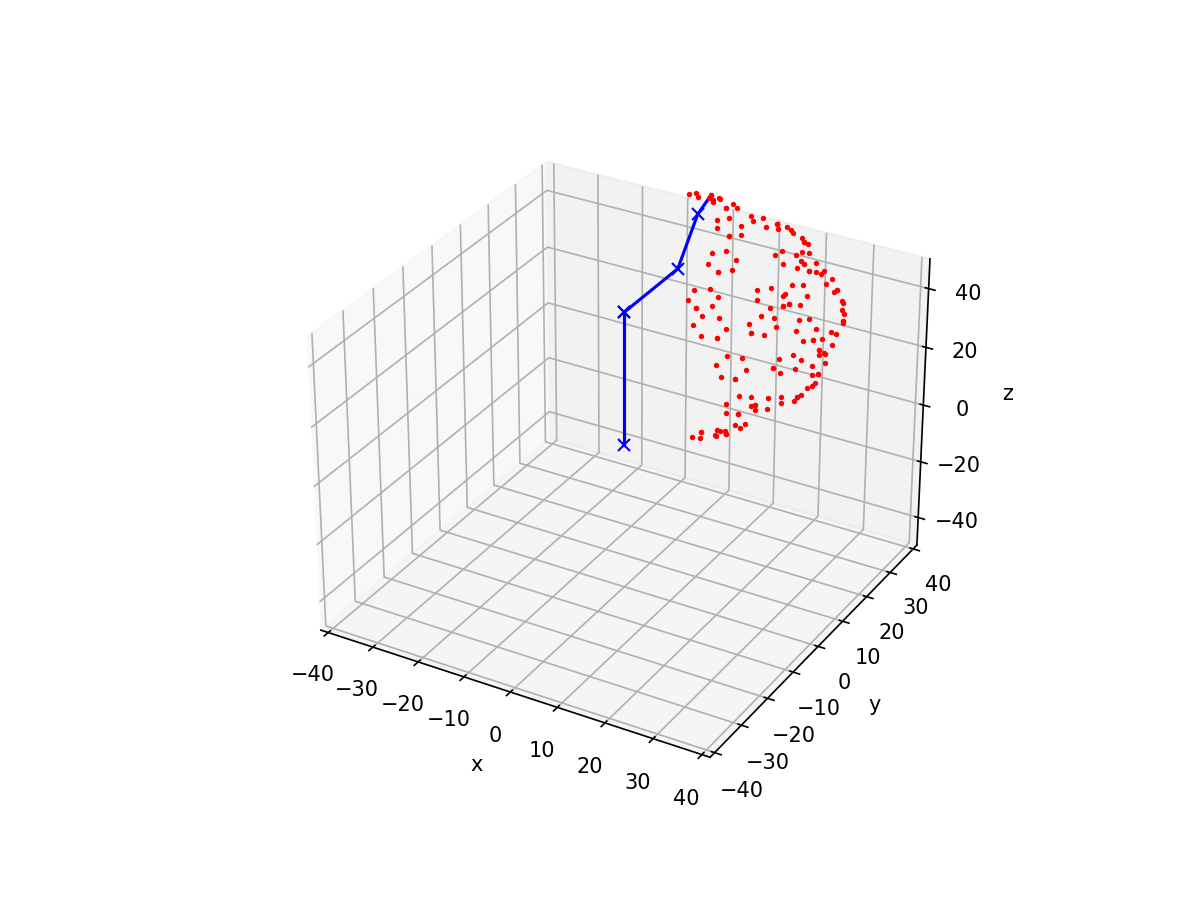

Joint 1 position:


Matrix([
[0],
[0],
[0],
[1]])

Joint 2 position:


Matrix([
[ 0],
[ 0],
[45],
[ 1]])

Joint 3 position:


Matrix([
[1.22464679914735e-15],
[                20.0],
[                  45],
[                   1]])

Joint 4 position:


Matrix([
[1.68388934882761e-15],
[                27.5],
[    57.9903810567666],
[                   1]])

Joint 5 position:


Matrix([
[2.73084456401818e-15],
[    32.5980762113533],
[    60.8205080756888],
[                   1]])

In [102]:
# Assign Variables
d_theta = 30
theta2_range = np.arange(-30, 90 + d_theta, d_theta)
# theta2_range = [0]
theta3_range = np.arange(-60, 60 + d_theta, d_theta)
# theta3_range = [0]
theta4_range = np.arange(0, 360 + d_theta*2, d_theta*2)
# theta4_range = [0]
# d1_range = np.arange(0, 40 + 5, 5)
d1_range = [40]

ax = plt.figure(figsize=[8, 6]).add_subplot(projection='3d')

for d1_val in d1_range:
    for theta2_val in theta2_range:
        theta2_val = theta2_val * np.pi / 180
        for theta3_val in theta3_range:
            theta3_val = theta3_val * np.pi / 180
            for theta4_val in theta4_range:
                theta4_val = theta4_val * np.pi / 180
                values = {l0: l0_val, l2: l2_val, l3: l3_val, l4: l4_val, le: le_val, 
                          theta2: theta2_val, theta3: theta3_val, theta4: theta4_val, 
                          d1: d1_val}
                end_pos = P0e.subs(values)
                ax.scatter(end_pos[0], end_pos[1], end_pos[2], s=10, c='r', marker='.')

Pii_pos = Matrix([0, 0, 0, 1])
P01_pos = (T01 * Pii_pos).subs(values)
P02_pos = (T01 * T12 * Pii_pos).subs(values)
P03_pos = (T01 * T12 * T23 * Pii_pos).subs(values)
P04_pos = (T01 * T12 * T23 * T34 * Pii_pos).subs(values)


plot_links(ax, [Pii_pos, P01_pos, P02_pos, P03_pos, P04_pos, end_pos],
           show_coor=False)

joint_print([Pii_pos, P01_pos, P03_pos, P04_pos, end_pos], alias)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x_max = l2_val + l3_val + l4_val
z_max = d1_range[-1] + l0_val + le_val
ax.set_xlim([-x_max*1, x_max*1])
ax.set_ylim([-x_max*1, x_max*1])
ax.set_zlim([-z_max*1, z_max*1])
plt.show()

## Cartesian Workspace Animation

<IPython.core.display.Javascript object>


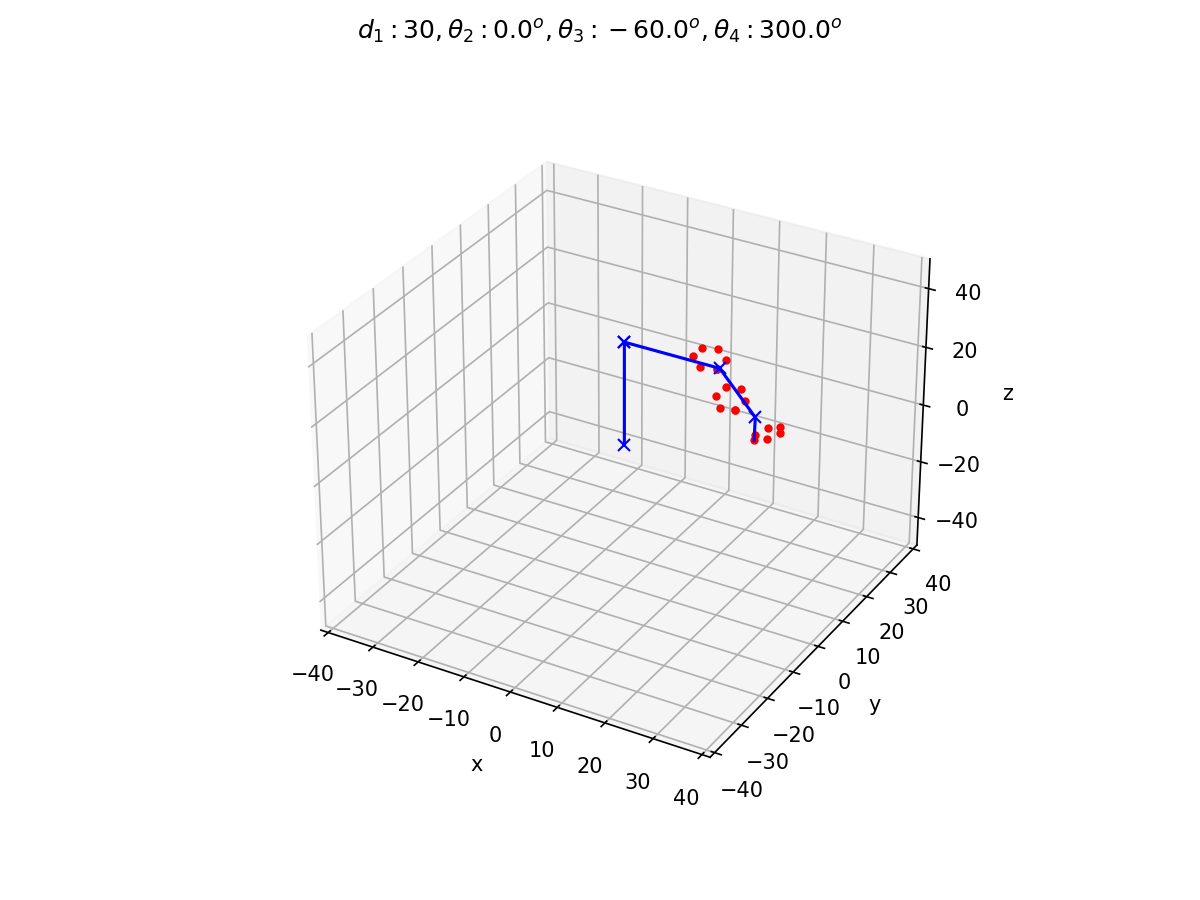

KeyboardInterrupt: 

In [103]:
%matplotlib notebook

# Assign Variables
d_theta = 30
theta2_range = np.arange(-30, 90 + d_theta, d_theta)
# theta2_range = [0]
theta3_range = np.arange(-60, 60 + d_theta, d_theta)
# theta3_range = [0]
theta4_range = np.arange(0, 360 + d_theta*2, d_theta*2)
# theta4_range = [0]
d1_range = np.arange(20, 40 + 10, 10)
# d1_range = [40]

plt.ion()

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x_max = l2_val + l3_val + l4_val
z_max = d1_range[-1] + l0_val + le_val
ax.set_xlim([-x_max*1, x_max*1])
ax.set_ylim([-x_max*1, x_max*1])
ax.set_zlim([-z_max*1, z_max*1])

# lines = ax.scatter([0], [0], [0], s=10, c='r', marker='.')  
line1, = ax.plot([0], [0], [0], 'r.')
line2, = ax.plot([0], [0], [0], 'b-')
line3, = ax.plot([0], [0], [0], 'bx')

end_memory = []

for d1_val in d1_range:
    for theta2_val in theta2_range:
        theta2_val = theta2_val * np.pi / 180
        for theta3_val in theta3_range:
            theta3_val = theta3_val * np.pi / 180
            for theta4_val in theta4_range:
                theta4_val = theta4_val * np.pi / 180
                values = {l0: l0_val, l2: l2_val, l3: l3_val, l4: l4_val, le: le_val, 
                          theta2: theta2_val, theta3: theta3_val, theta4: theta4_val, 
                          d1: d1_val}
                end_pos = P0e.subs(values)
                
                if len(end_memory) < 20:
                    end_memory.append(end_pos[:3])
                else:
                    end_memory = end_memory[1:] + [end_pos[:3]]
                    
                line1.set_xdata([i[0] for i in end_memory])
                line1.set_ydata([i[1] for i in end_memory])
                line1.set_3d_properties([i[2] for i in end_memory])
    
                Pii_pos = Matrix([0, 0, 0, 1])
                P01_pos = (T01 * Pii_pos).subs(values)
                P02_pos = (T01 * T12 * Pii_pos).subs(values)
                P03_pos = (T01 * T12 * T23 * Pii_pos).subs(values)
                P04_pos = (T01 * T12 * T23 * T34 * Pii_pos).subs(values)


                plot_links_moving(line2, line3, [Pii_pos, P01_pos, P02_pos, P03_pos, P04_pos, end_pos])
                fig.suptitle('$d_1: %d, \\theta_2: %.1f^o, \\theta_3: %.1f^o, \
                             \\theta_4: %.1f^o$' % (d1_val, theta2_val/pi*180, theta3_val/pi*180, theta4_val/pi*180))
                fig.canvas.draw()
                fig.canvas.flush_events()
#                 time.sleep(0.1)


## Inverse Kinematics

To prove the correctness of inverse kinematics equation. 

First making a $^0_eT$ from $[\theta_2, \theta_3, \theta_4, d_1]$. Taking $r_{ii}, X, Y, Z$ from $^0_eT$. These values are used in inverse kinematics equations to find $[\theta_2, \theta_3, \theta_4, d_1]$.

If the equations are correct, the resulted $[\theta_2, \theta_3, \theta_4, d_1]$ found should be equal to the values set at the beginning.

In [97]:
r11 = symbols('r_{11}')
r12 = symbols('r_{12}')
r13 = symbols('r_{13}')
r21 = symbols('r_{21}')
r22 = symbols('r_{22}')
r23 = symbols('r_{23}')
r31 = symbols('r_{31}')
r32 = symbols('r_{32}')
r33 = symbols('r_{33}')
X = symbols('X')
Y = symbols('Y')
Z = symbols('Z')

# theta2_val = 90/180*np.pi
# theta3_val = -45/180*np.pi
# theta4_val = 152/180*np.pi
# d1_val = 25

# Or assign random values:
theta2_val = (np.random.rand()*360-180)/180*np.pi
theta3_val = (np.random.rand()*300-150)/180*np.pi
theta4_val = (np.random.rand()*360-180)/180*np.pi
d1_val = np.random.rand() * 40

values = {l0: l0_val, l2: l2_val, l3: l3_val, l4: l4_val, le: le_val, 
          theta2: theta2_val, theta3: theta3_val, theta4: theta4_val, 
          d1: d1_val}
T0e_target = T0e.subs(values)
# convert infinitely small non-zero float to zero
T0e_target = np.array(T0e_target)
T0e_target[np.abs(T0e_target) < 1e-7] = 0

symprint('Target', 0, 'e')
display(Matrix([[r11, r12, r13, X],
                [r21, r22, r23, Y],
                [r31, r32, r33, Z],
                [0, 0, 0, 1]]))
matprint(Matrix(T0e_target), alias)

^0Target_e

Matrix([
[r_{11}, r_{12}, r_{13}, X],
[r_{21}, r_{22}, r_{23}, Y],
[r_{31}, r_{32}, r_{33}, Z],
[     0,      0,      0, 1]])

Matrix([
[ -0.955531589934572,  0.242186074895879,  0.168241747980803, 10.1623233307124],
[-0.0100041123357286,  0.543574781113318, -0.839301123002932, -36.365907509201],
[  -0.29471901596857, -0.803661845843223, -0.516980018146138, 10.6734607482802],
[                  0,                  0,                  0,                1]])

Read $r_{ii}, X, Y, Z$ values from $^0_eTarget$, or overwrite them

In [98]:
r11_val = T0e_target[0, 0]
r12_val = T0e_target[0, 1]
r13_val = T0e_target[0, 2]
r21_val = T0e_target[1, 0]
r22_val = T0e_target[1, 1]
r23_val = T0e_target[1, 2]
r31_val = T0e_target[2, 0]
r32_val = T0e_target[2, 1]
r33_val = T0e_target[2, 2]
X_val = T0e_target[0, 3]
Y_val = T0e_target[1, 3]
Z_val = T0e_target[2, 3]

target_vals = {l0: l0_val, l2: l2_val, l3: l3_val, l4: l4_val, le: le_val, 
               r11: r11_val, r12: r12_val, r13: r13_val, 
               r21: r21_val, r22: r22_val, r23: r23_val, 
               r31: r31_val, r32: r32_val, r33: r33_val, 
               X: X_val, Y: Y_val, Z: Z_val}

d1_inv =le*r31 - l4*r33 + Z - l0 - l3*r33
d1_ans = d1_inv.subs(target_vals)
eqnprint(d1, alias, d1_inv, d1_ans)

theta2_inv = atan2((le*r21 - r23*(l3+l4) + Y)/l2, (le*r11 - r13*(l3+l4) + X)/l2)
theta2_ans = round(theta2_inv.subs(target_vals), 10)  # round applied due to float precision
eqnprint(theta2, alias, theta2_inv, theta2_ans)

if round(sin(theta2_ans), 7) != 0:
    print('Case 1: theta2 != 0 & +- 180 deg')
    theta3_inv = atan2(r33, r23/sin(theta2_ans))
    eqnprint(theta3, alias, atan2(r33, r23/sin(theta2)))
else:
    print('Case 2: theta2 != +-90 deg')
    theta3_inv = atan2(r33, r13/cos(theta2_ans))
    eqnprint(theta3, alias, atan2(r33, r13/cos(theta2)))
    
theta3_ans = float(theta3_inv.subs(target_vals))
# theta3 range from -180 to 180 deg
if theta3_ans > np.pi:
    theta3_ans -= 2*np.pi 
eqnprint(theta3, alias, None, theta3_ans)

if theta3_ans == np.pi/2:
    print('Case 1: theta3 = 90 deg')
    theta4_inv = atan2(r12, -r11) - theta2_ans
    eqnprint(theta4, alias, atan2(r12, -r11) - theta2)
elif theta3_ans == -np.pi/2:
    print('Case 2: theta3 = -90 deg')
    theta4_inv = atan2(-r12, r11) + theta2_ans
    eqnprint(theta4, alias, atan2(-r12, r11) + theta2)
else:
    print('Case 3: theta3 != +-90 deg')
    theta4_inv = atan2(-r32/cos(theta3_ans), r31/cos(theta3_ans))
    eqnprint(theta4, alias, atan2(-r32/cos(theta3), r31/cos(theta3)))

theta4_ans = float(theta4_inv.subs(target_vals))
# theta4 range from -180 to 180 deg
if theta4_ans > np.pi:
    theta4_ans -= 2*np.pi 
eqnprint(theta4, alias, None, theta4_ans)
    
print('\nTrue values:')
print(d1_val)
print(theta2_val)
print(theta3_val)
print(theta4_val)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Case 1: theta2 != 0 & +- 180 deg


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Case 3: theta3 != +-90 deg


<IPython.core.display.Math object>

<IPython.core.display.Math object>


True values:
15.128904063297291
-1.3729637160412695
-0.5433191500040255
1.9222882905076748


Plot inverse kinematics result as a prove

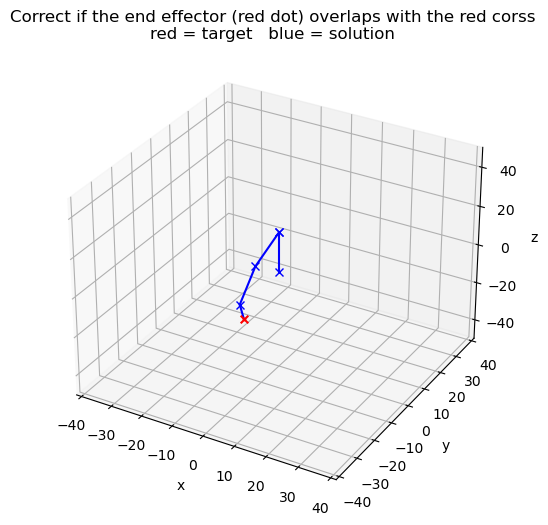

In [99]:
ax = plt.figure(figsize=[8, 6]).add_subplot(projection='3d')

# target values (target position of end effector)
P0e_target = Matrix(T0e_target) * Pee
ax.scatter(P0e_target[0], P0e_target[1], P0e_target[2], s=30, c='r', marker='x')


# solutino values (position of end effector found from inverse kinematics equations)
solution_vals = {l0: l0_val, l2: l2_val, l3: l3_val, l4: l4_val, le: le_val, 
                 theta2: theta2_ans, theta3: theta3_ans, theta4: theta4_ans, 
                 d1: d1_ans}
end_pos = P0e.subs(solution_vals)
ax.scatter(end_pos[0], end_pos[1], end_pos[2], s=10, c='r', marker='.')

Pii_pos = Matrix([0, 0, 0, 1])
P01_pos = (T01 * Pii_pos).subs(solution_vals)
P02_pos = (T01 * T12 * Pii_pos).subs(solution_vals)
P03_pos = (T01 * T12 * T23 * Pii_pos).subs(solution_vals)
P04_pos = (T01 * T12 * T23 * T34 * Pii_pos).subs(solution_vals)

plot_links(ax, [Pii_pos, P01_pos, P02_pos, P03_pos, P04_pos, end_pos],
           show_coor=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x_max = l2_val + l3_val + l4_val
z_max = d1_range[-1] + l0_val + le_val
ax.set_xlim([-x_max*1, x_max*1])
ax.set_ylim([-x_max*1, x_max*1])
ax.set_zlim([-z_max*1, z_max*1])
ax.set_title("Correct if the end effector (red dot) overlaps with the red corss\nred = target   blue = solution")
plt.show()